In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_csv('2.csv')

In [5]:
data=df[df['Instance Name'] == 'network.interface.packets.in']
data

,Device Name,Instance Name,Updated time (America/Los_Angeles),Packet Rate
0,csn501,network.interface.packets.in,07-Mar-2016 04:00:00 PM,559.27
1,csn501,network.interface.packets.in,07-Mar-2016 05:00:00 PM,564.02
2,csn501,network.interface.packets.in,07-Mar-2016 06:00:00 PM,580.97
3,csn501,network.interface.packets.in,07-Mar-2016 07:00:00 PM,565.64
4,csn501,network.interface.packets.in,07-Mar-2016 08:00:00 PM,549.09
...,...,...,...,...
162,csn501,network.interface.packets.in,14-Mar-2016 11:00:00 AM,576.76
163,csn501,network.interface.packets.in,14-Mar-2016 12:00:00 PM,569.96
164,csn501,network.interface.packets.in,14-Mar-2016 01:00:00 PM,573.23
165,csn501,network.interface.packets.in,14-Mar-2016 02:00:00 PM,607.92


In [6]:
data.rename(columns={'Updated time (America/Los_Angeles)':'Updated_time'}, inplace= True)
data['Updated_time'] = pd.to_datetime(data['Updated_time'])
data.set_index('Updated_time', inplace = True)

/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_81435/2050893039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Updated time (America/Los_Angeles)':'Updated_time'}, inplace= True)
/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_81435/2050893039.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Updated_time'] = pd.to_datetime(data['Updated_time'])
/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_81435/2050893039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

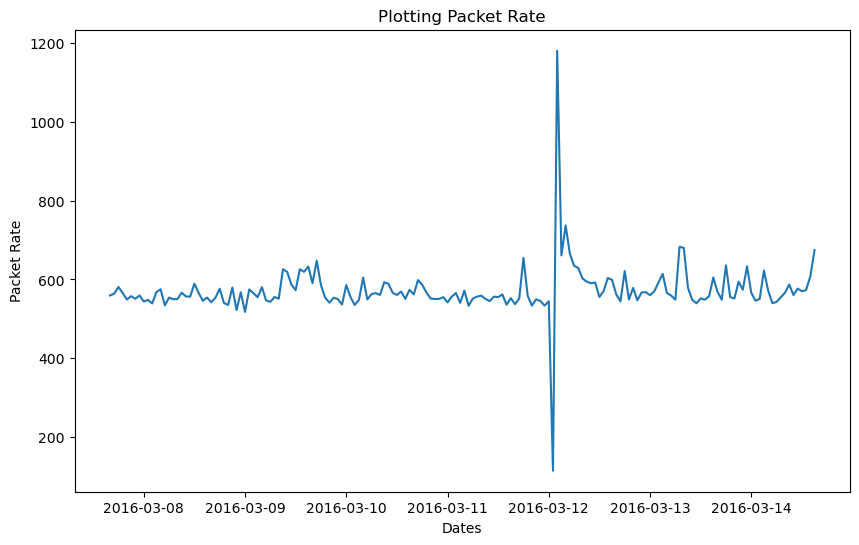

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Packet Rate'])
plt.title("Plotting Packet Rate")
plt.xlabel('Dates')
plt.ylabel('Packet Rate')
plt.show()

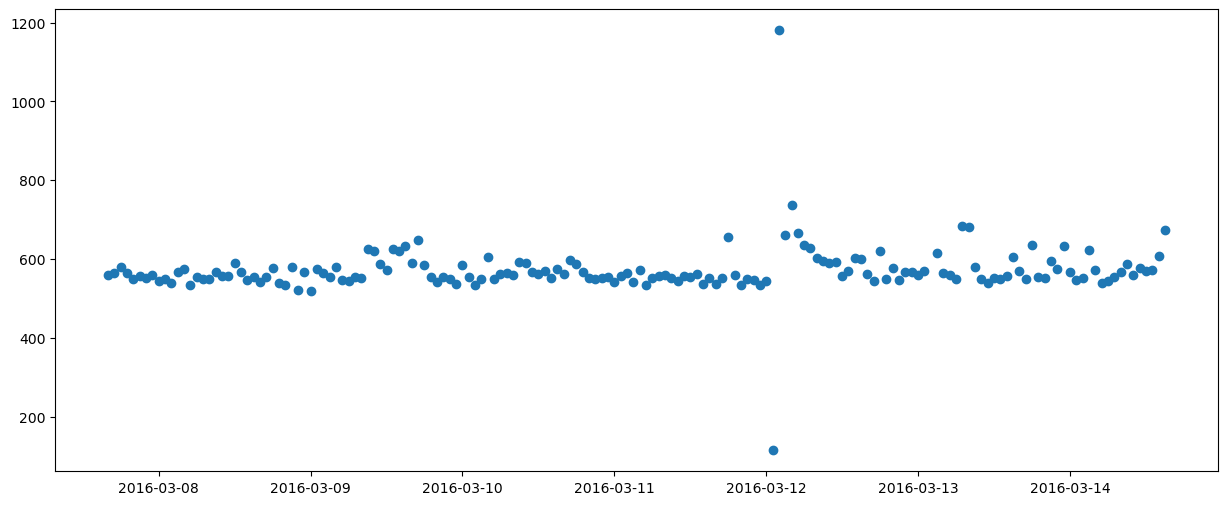

In [8]:
plt.figure(figsize=(15,6))
plt.scatter(data.index, data['Packet Rate'], label='Scatter Plot')

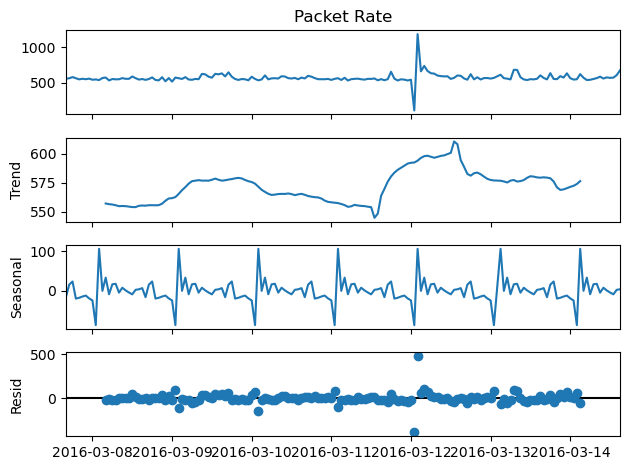

In [9]:
period = 24
result = seasonal_decompose(data['Packet Rate'], model='additve', period=period)
result.plot()
plt.show()

In [10]:
data["P_R_diff"] = data["Packet Rate"].diff()
data.fillna(0, inplace=True)
data

/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_81435/2832168205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["P_R_diff"] = data["Packet Rate"].diff()
/var/folders/t1/80nmj049513cmg5r1hr_2tpc0000gp/T/ipykernel_81435/2832168205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


,Device Name,Instance Name,Packet Rate,P_R_diff
Updated_time,,,,
2016-03-07 16:00:00,csn501,network.interface.packets.in,559.27,0.00
2016-03-07 17:00:00,csn501,network.interface.packets.in,564.02,4.75
2016-03-07 18:00:00,csn501,network.interface.packets.in,580.97,16.95
2016-03-07 19:00:00,csn501,network.interface.packets.in,565.64,-15.33
2016-03-07 20:00:00,csn501,network.interface.packets.in,549.09,-16.55
...,...,...,...,...
2016-03-14 11:00:00,csn501,network.interface.packets.in,576.76,16.24
2016-03-14 12:00:00,csn501,network.interface.packets.in,569.96,-6.80
2016-03-14 13:00:00,csn501,network.interface.packets.in,573.23,3.27


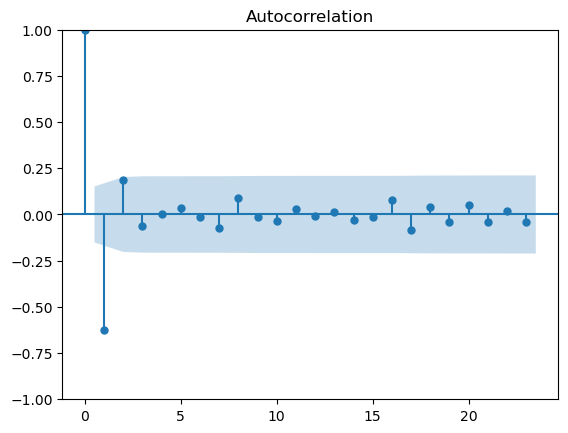

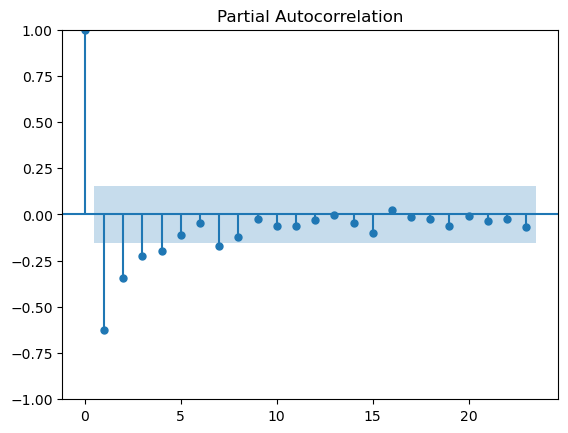

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(data['P_R_diff'])
plot_pacf(data['P_R_diff'], method='ywm')
plt.show()

In [43]:
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]
train['Packet Rate']

Updated_time
2016-03-07 16:00:00    559.27
2016-03-07 17:00:00    564.02
2016-03-07 18:00:00    580.97
2016-03-07 19:00:00    565.64
2016-03-07 20:00:00    549.09
                        ...  
2016-03-13 01:00:00    569.63
2016-03-13 03:00:00    614.26
2016-03-13 04:00:00    565.40
2016-03-13 05:00:00    559.25
2016-03-13 06:00:00    548.51
Name: Packet Rate, Length: 134, dtype: float64

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

In [50]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')
 
 
check_stationarity(data['Packet Rate'])

ADF Statistic: -15.048645645640063
p-value: 9.363778010114625e-28
Stationary


In [51]:
p,d,q=1,1,1
P,D,Q,s=1,1,1,24
model = SARIMAX(train['Packet Rate'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results=model.fit()
model

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18677D+00    |proj g|=  5.55059D-01

At iterate    5    f=  4.88241D+00    |proj g|=  3.52082D-02

At iterate   10    f=  4.87959D+00    |proj g|=  6.56590D-03

At iterate   15    f=  4.82778D+00    |proj g|=  7.45375D-02

At iterate   20    f=  4.80123D+00    |proj g|=  3.34101D-03

At iterate   25    f=  4.80106D+00    |proj g|=  1.30840D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   

In [52]:
forecast_periods = 33 # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
 
# forecast_ci

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


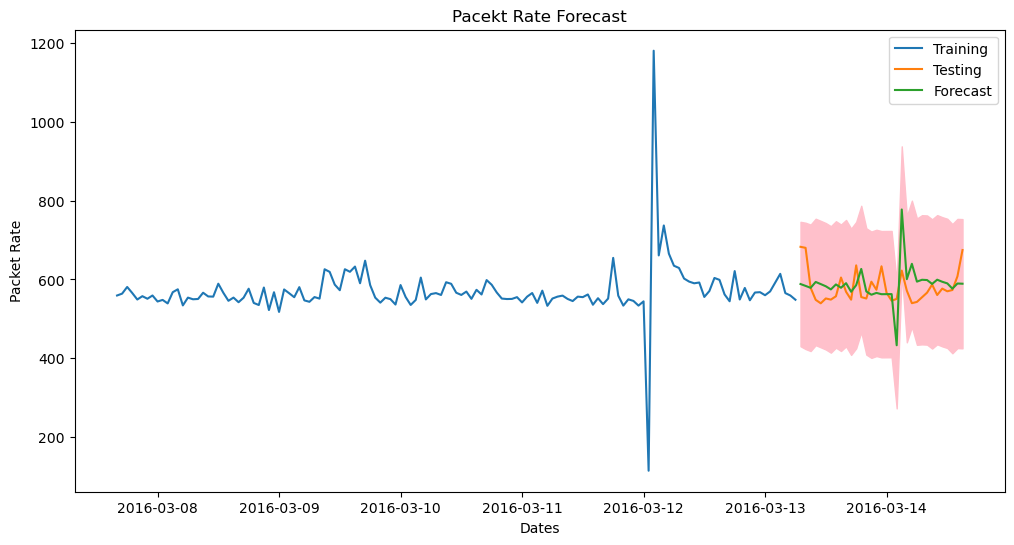

In [53]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train['Packet Rate'], label='Training')
plt.plot(test['Packet Rate'],label='Testing')
plt.plot(test.index,forecast_mean, label='Forecast')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Pacekt Rate Forecast")
plt.xlabel("Dates")
plt.ylabel("Packet Rate")
plt.legend()
plt.savefig('SARIMA.jpeg')
plt.show()

In [81]:
observed = test['Packet Rate']
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean)
rmse = root_mean_squared_error(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RSME: {rmse}')

MAE: 43.22642622833106
MSE: 3196.550690736022
MAPE: 0.07325076745518908
RSME: 56.53804640006605


In [82]:
%store -r models
models

,Model,MAE,MAPE,MSE,RMSE
0,SARIMA,43.226426,0.073251,3196.550691,56.538046
1,ARIMA,28.428438373739624,0.04635282210911343,1739.817423160859,41.711118699465004
